<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n250.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.039011,79.060840,68.706947,30.399020,-0.015453,213.190364,213.012868,0.177496
1,0.0,1.0,56.334346,73.999889,79.177270,54.296668,-0.125794,273.682379,273.705376,-0.022997
2,0.0,2.0,93.761981,44.346323,97.276211,75.839521,0.584913,321.808949,321.208421,0.600528
3,0.0,3.0,41.480739,39.869248,31.574563,40.384965,0.204440,163.513956,163.159865,0.354090
4,0.0,4.0,83.139229,89.573728,24.717368,41.885993,0.038543,249.354861,249.248574,0.106286
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.593149,35.264770,98.422040,25.150507,-1.014108,244.416358,245.725775,-1.309418
249996,999.0,246.0,58.336260,31.055046,57.527704,79.371744,-0.011339,236.279415,236.229043,0.050371
249997,999.0,247.0,94.295574,85.539671,86.500498,45.308086,-1.249683,320.394146,321.849941,-1.455795
249998,999.0,248.0,76.889882,51.624687,58.940193,71.036650,-1.022651,267.468762,268.496686,-1.027925


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.039011,79.060840,68.706947,30.399020,-0.015453,213.190364,213.012868,0.177496
1,0.0,1.0,56.334346,73.999889,79.177270,54.296668,-0.125794,273.682379,273.705376,-0.022997
2,0.0,2.0,93.761981,44.346323,97.276211,75.839521,0.584913,321.808949,321.208421,0.600528
3,0.0,3.0,41.480739,39.869248,31.574563,40.384965,0.204440,163.513956,163.159865,0.354090
4,0.0,4.0,83.139229,89.573728,24.717368,41.885993,0.038543,249.354861,249.248574,0.106286
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.593149,35.264770,98.422040,25.150507,-1.014108,244.416358,245.725775,-1.309418
249996,999.0,246.0,58.336260,31.055046,57.527704,79.371744,-0.011339,236.279415,236.229043,0.050371
249997,999.0,247.0,94.295574,85.539671,86.500498,45.308086,-1.249683,320.394146,321.849941,-1.455795
249998,999.0,248.0,76.889882,51.624687,58.940193,71.036650,-1.022651,267.468762,268.496686,-1.027925


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.039011  79.060840  68.706947  30.399020 -0.015453  213.190364   
      1.0    56.334346  73.999889  79.177270  54.296668 -0.125794  273.682379   
      2.0    93.761981  44.346323  97.276211  75.839521  0.584913  321.808949   
      3.0    41.480739  39.869248  31.574563  40.384965  0.204440  163.513956   
      4.0    83.139229  89.573728  24.717368  41.885993  0.038543  249.354861   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  76.593149  35.264770  98.422040  25.150507 -1.014108  244.416358   
      246.0  58.336260  31.055046  57.527704  79.371744 -0.011339  236.279415   
      247.0  94.295574  85.539671  86.500498  45.308086 -1.249683  320.394146   
      248.0  76.889882  51.624687  58.940193  71.036650 -1.022651  267.468762   
      249.0  53.792482  58.573652  77.094930  54.569242  0.397394  254.427699   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.012868  0.177496  
      1.0    273.705376 -0.022997  
      2.0    321.208421  0.600528  
      3.0    163.159865  0.354090  
      4.0    249.248574  0.106286  
...                 ...       ...  
999.0 245.0  245.725775 -1.309418  
      246.0  236.229043  0.050371  
      247.0  321.849941 -1.455795  
      248.0  268.496686 -1.027925  
      249.0  254.106467  0.321232  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.039011  79.060840  68.706947  30.399020 -0.015453  213.190364   
      1.0    56.334346  73.999889  79.177270  54.296668 -0.125794  273.682379   
      2.0    93.761981  44.346323  97.276211  75.839521  0.584913  321.808949   
      3.0    41.480739  39.869248  31.574563  40.384965  0.204440  163.513956   
      4.0    83.139229  89.573728  24.717368  41.885993  0.038543  249.354861   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  76.593149  35.264770  98.422040  25.150507 -1.014108  244.416358   
      246.0  58.336260  31.055046  57.527704  79.371744 -0.011339  236.279415   
      247.0  94.295574  85.539671  86.500498  45.308086 -1.249683  320.394146   
      248.0  76.889882  51.624687  58.940193  71.036650 -1.022651  267.468762   
      249.0  53.792482  58.573652  77.094930  54.569242  0.397394  254.427699   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.012868  0.177496  
      1.0    273.705376 -0.022997  
      2.0    321.208421  0.600528  
      3.0    163.159865  0.354090  
      4.0    249.248574  0.106286  
...                 ...       ...  
999.0 245.0  245.725775 -1.309418  
      246.0  236.229043  0.050371  
      247.0  321.849941 -1.455795  
      248.0  268.496686 -1.027925  
      249.0  254.106467  0.321232  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,25.039011,79.060840,68.706947,30.399020,-0.015453,213.190364,213.012868,0.177496
1,0.0,1.0,56.334346,73.999889,79.177270,54.296668,-0.125794,273.682379,273.705376,-0.022997
2,0.0,2.0,93.761981,44.346323,97.276211,75.839521,0.584913,321.808949,321.208421,0.600528
3,0.0,3.0,41.480739,39.869248,31.574563,40.384965,0.204440,163.513956,163.159865,0.354090
4,0.0,4.0,83.139229,89.573728,24.717368,41.885993,0.038543,249.354861,249.248574,0.106286
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.593149,35.264770,98.422040,25.150507,-1.014108,244.416358,245.725775,-1.309418
249996,999.0,246.0,58.336260,31.055046,57.527704,79.371744,-0.011339,236.279415,236.229043,0.050371
249997,999.0,247.0,94.295574,85.539671,86.500498,45.308086,-1.249683,320.394146,321.849941,-1.455795
249998,999.0,248.0,76.889882,51.624687,58.940193,71.036650,-1.022651,267.468762,268.496686,-1.027925


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    25.039011  79.060840  68.706947  30.399020 -0.015453  213.190364   
      1.0    56.334346  73.999889  79.177270  54.296668 -0.125794  273.682379   
      2.0    93.761981  44.346323  97.276211  75.839521  0.584913  321.808949   
      3.0    41.480739  39.869248  31.574563  40.384965  0.204440  163.513956   
      4.0    83.139229  89.573728  24.717368  41.885993  0.038543  249.354861   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  76.593149  35.264770  98.422040  25.150507 -1.014108  244.416358   
      246.0  58.336260  31.055046  57.527704  79.371744 -0.011339  236.279415   
      247.0  94.295574  85.539671  86.500498  45.308086 -1.249683  320.394146   
      248.0  76.889882  51.624687  58.940193  71.036650 -1.022651  267.468762   
      249.0  53.792482  58.573652  77.094930  54.569242  0.397394  254.427699   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    213.012868  0.177496  
      1.0    273.705376 -0.022997  
      2.0    321.208421  0.600528  
      3.0    163.159865  0.354090  
      4.0    249.248574  0.106286  
...                 ...       ...  
999.0 245.0  245.725775 -1.309418  
      246.0  236.229043  0.050371  
      247.0  321.849941 -1.455795  
      248.0  268.496686 -1.027925  
      249.0  254.106467  0.321232  

[250000 rows x 8 columns]

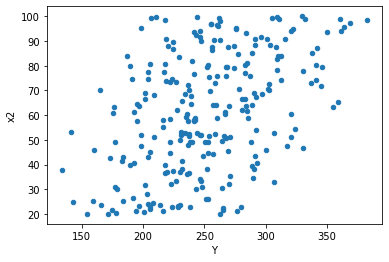

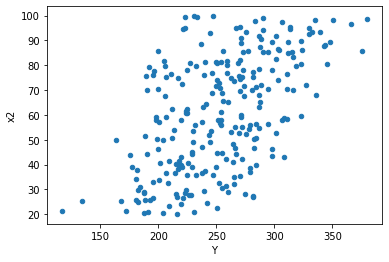

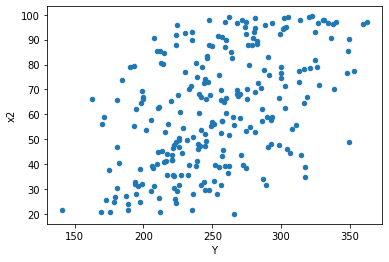

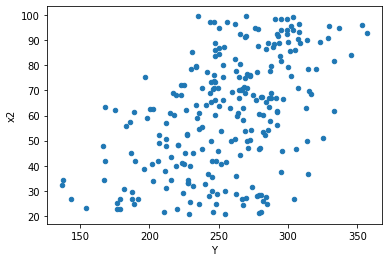

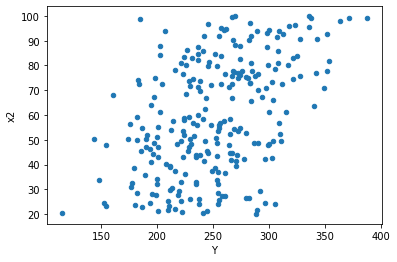

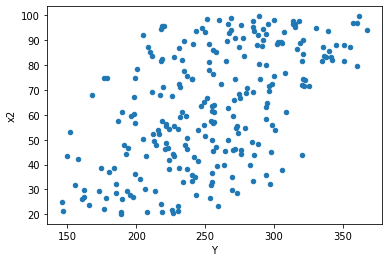

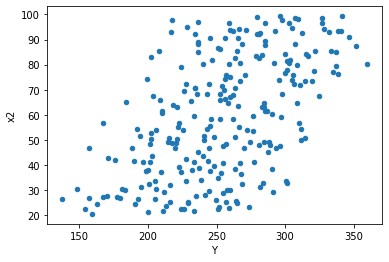

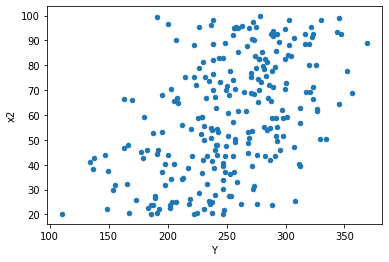

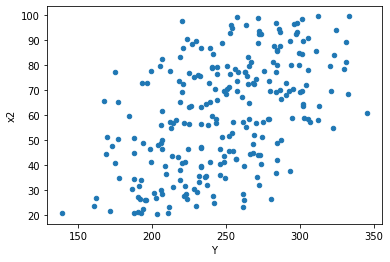

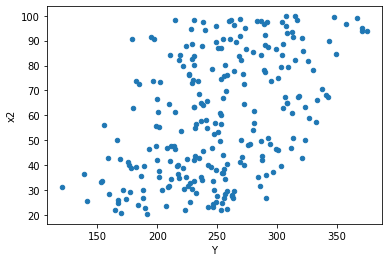

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,96.0,96.0,35.94100245997738,45.8889528497533,0.37438544229143106,0.47800992551826355,1.2767855571322364,0.23308294995422751,0.8834585250228862,0.11654147497711376,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,39.7373433007104,72.63900346833903,0.4139306593824,0.7566562861285315,1.8279783557407683,0.0034380216790781404,0.9982809891604609,0.0017190108395390702,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,38.315306977354304,48.009559232207984,0.39911778101410733,0.5000995753354999,1.2530125169187167,0.27092596009850234,0.8645370199507488,0.13546298004925117,Reject005=1 : Homoscedasticity
9.0,96.0,96.0,53.494073774140986,59.505038159799625,0.5572299351473019,0.6198441474979127,1.1123669214469947,0.6029147532975607,0.6985426233512196,0.30145737664878036,Reject005=1 : Homoscedasticity
11.0,96.0,96.0,37.631236602334724,39.75969553541356,0.3919920479409867,0.41416349516055795,1.056560961723665,0.7880679612913459,0.605966019354327,0.39403398064567297,Reject005=1 : Homoscedasticity
12.0,96.0,96.0,37.260304612242074,47.29610018821896,0.3881281730441883,0.49266771029394746,1.2693428215473999,0.24442746036808338,0.8777862698159583,0.12221373018404169,Reject005=1 : Homoscedasticity
14.0,96.0,96.0,34.88328732798639,73.15031600375849,0.36336757633319156,0.7619824583724842,2.0970017910287653,0.00034583719930170176,0.9998270814003491,0.00017291859965085088,Reject005=0 : Heteroscedasticity
16.0,96.0,96.0,52.093413047497805,53.859797903473016,0.5426397192447688,0.5610395614945106,1.0339080269968999,0.8705720668778654,0.5647139665610673,0.4352860334389327,Reject005=1 : Homoscedasticity
19.0,96.0,96.0,40.976994561594644,46.841939051676796,0.4268436933499442,0.4879368651216333,1.1431277367418016,0.513511179117895,0.7432444104410525,0.2567555895589475,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,54.83719969036777,51.975500983258826,0.5712208301079976,0.5414114685756127,0.9478146454730143,0.793422622226146,Reject005=1 : Homoscedasticity
1.0,96.0,96.0,49.64424216198036,45.929656724685074,0.5171275225206288,0.47843392421546954,0.9251759060965167,0.7039737526673073,Reject005=1 : Homoscedasticity
2.0,96.0,96.0,73.8900291074947,37.19485164571807,0.7696878032030697,0.3874463713095632,0.50338120169918,0.0008938806094932972,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,56.963969442784446,50.83506300309706,0.5933746816956713,0.5295319062822611,0.8924073146650471,0.5781673195224585,Reject005=1 : Homoscedasticity
4.0,96.0,96.0,35.94100245997738,45.8889528497533,0.37438544229143106,0.47800992551826355,1.2767855571322364,0.23308294995422751,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,39.7373433007104,72.63900346833903,0.4139306593824,0.7566562861285315,1.8279783557407683,0.0034380216790781404,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,52.113307905930526,42.60800868022333,0.542846957353443,0.4438334237523263,0.8176032263608142,0.32553153275889746,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,60.956660961474704,40.800056162773046,0.6349652183486948,0.4250005850288859,0.6693289218804019,0.050557808770466006,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,38.315306977354304,48.009559232207984,0.39911778101410733,0.5000995753354999,1.2530125169187167,0.27092596009850234,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      851
Reject005=0 : Heteroscedasticity    149
Name: Result_test, dtype: int64